#                     Statistical Learning Project

# 1.Import the necessary libraries

In [1]:
#import Pandas,Numpy,Seaborn,Matplotlib for Exploratory Data Analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
#import scipy for Statistical Analysis
import scipy.stats as stats
#import sci-kit learn library to perform label-encoding
from sklearn.preprocessing import LabelEncoder
import copy

# 2. Read the data as a data frame

In [2]:
# Import the dataset 'insurance'.csv'
mydata = pd.read_csv("insurance.csv")

In [4]:
# view the first 5 rows of the dataset
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA

# 3.a. Shape of the data

In [5]:
#To check the dimension or shape of the dataset
shape = mydata.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (1338, 7)

Number of rows : 1338

Number of columns : 7


Two dimensional dataframe consists of 1338 rows and 7 columns.

# 3.b. Data type of each attribute

In [7]:
# To view the data type and number of values entered in each of the attribute
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Value of all attributes have no-null data.

In [8]:
#dtype() return a Series with the data type of each attribute
dataType = mydata.dtypes
print('Data type of each attribute:')
print(dataType)

Data type of each attribute:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


'sex','smoker' and 'region'= type object.
'Age','Children' =type int64.
'bmi','charges' = type float64.

# 3.c. Checking the presence of missing values

In [10]:
# Detect all the missing values in the Dataframe
Missing_values = mydata.isna().apply(pd.value_counts)
print("Presence of missing values:")
print(Missing_values)

Presence of missing values:
        age   sex   bmi  children  smoker  region  charges
False  1338  1338  1338      1338    1338    1338     1338


In the output, cells corresponding to the missing values contains Boolean value.
In this case,Boolean value is false and showed the total count of false values in each column.

In [11]:
# display Number of missing values in each of the attribute
pd.DataFrame(mydata.isnull().sum(),columns= [ 'No of missing values'])

,No of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


There's no presence of Missing values and Null values in this DataFrame

# 3.d. 5 point summary of numerical attributes (3 marks)

In [12]:
#describe() show the summary of statistics about all numeric attributes.
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In view of Age,data is normally distributed.
50% of people has BMI value of 30.
Only 5 people have 5 children.
Charge is higly skewed as 75% of the people spent charges of around 16639.912515  

In [13]:
#Alternate method to determine the five point summary of Numerical Attributes
#min(),max() to find the minimum and maximum value of each column in the dataframe
#Find Quartiles: Q1,Q2 and Q3 to describe the spread of Data

data ={'Age':[mydata['age'].min(),
              mydata['age'].quantile(q=0.25),
              mydata['age'].quantile(q=0.50),
              mydata['age'].quantile(q=0.75),
              mydata['age'].max()],
       'bmi':[mydata['bmi'].min(),
              mydata['bmi'].quantile(q=0.25),
              mydata['bmi'].quantile(q=0.50),
              mydata['bmi'].quantile(q=0.75),
              mydata['bmi'].max()],
       'children':[mydata['children'].min(),
              mydata['children'].quantile(q=0.25),
              mydata['children'].quantile(q=0.50),
              mydata['children'].quantile(q=0.75),
              mydata['children'].max()], 
        'charges':[mydata['charges'].min(),
              mydata['charges'].quantile(q=0.25),
              mydata['charges'].quantile(q=0.50),
              mydata['charges'].quantile(q=0.75),
              mydata['charges'].max()],
      }
       
fivepoint_summary = pd.DataFrame(data ,index=['Minimum','Q1(25%)','Q2(50%)','Q3(75%)','Maximum'])
print('5 point summary of numerical attributes \n', fivepoint_summary)
    


5 point summary of numerical attributes 
           Age       bmi  children       charges
Minimum  18.0  15.96000       0.0   1121.873900
Q1(25%)  27.0  26.29625       0.0   4740.287150
Q2(50%)  39.0  30.40000       1.0   9382.033000
Q3(75%)  51.0  34.69375       2.0  16639.912515
Maximum  64.0  53.13000       5.0  63770.428010


From this Summary , Minimum and maximum age of the People claiming Insurance are 18 and 54.
50% of people have only one child.So, the Dependent count is less 

# 3.e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

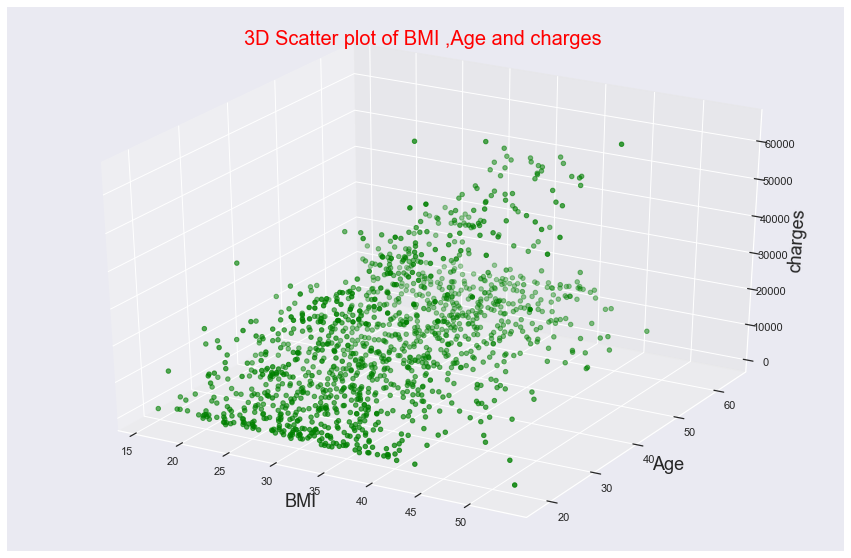

In [14]:
#Three Dimensional distribution of bmi,age and charges column
#preferred method of creating a 3D axes.
from mpl_toolkits import mplot3d
fig= plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d') # importing keyword for 3D projection
ax.scatter(mydata["bmi"],mydata["age"],mydata["charges"],color = 'green')
ax.set_title('3D Scatter plot of BMI ,Age and charges ',fontsize =20 ,color='Red')
ax.set_xlabel('BMI',fontsize = 18)#set x axis label
ax.set_ylabel('Age',fontsize =18)#set  y axis label
ax.set_zlabel('charges',fontsize = 18)#set z axis label
plt.show()

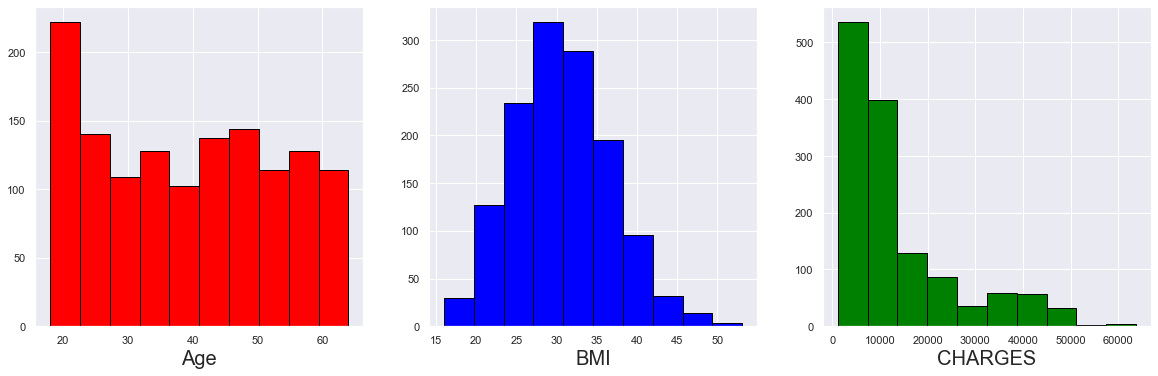

In [15]:
#Univariate Distribution of bmi,age and charge columns using Histograms 
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
#Plot Histogram of Age attribute
plt.hist(mydata['age'], color='red',edgecolor='black') 
plt.xlabel('Age',fontsize=20)
plt.subplot(3,3,2)
#Plot Histogram of bmi attribute
plt.hist(mydata['bmi'], color='blue',edgecolor='black')
plt.xlabel('BMI',fontsize=20)
plt.subplot(3,3,3)
#plot Histogram of charges attribute
plt.hist(mydata['charges'], color='green',edgecolor='black')
plt.xlabel('CHARGES',fontsize=20)
plt.show()

Age -Mostly 20 aged people are customers who claimed Health Insurance
Only few people has low BMI rate.

# 3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

Measure of skewness of BMI 0.2840471105987448


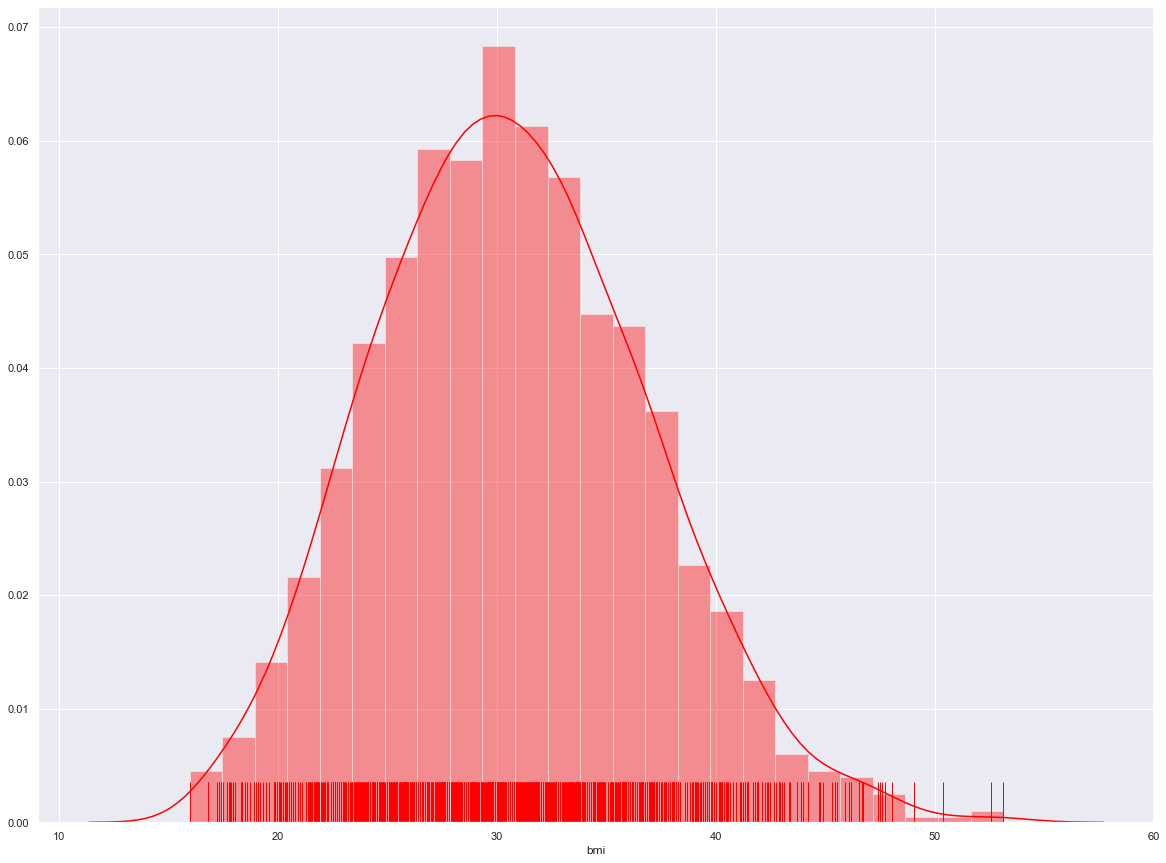

In [16]:
#Plot distribution of bmi 
plt.figure(figsize=(20,15))
sns.distplot(mydata['bmi'],rug=True,kde=True,color='Red');
#find the measure of the Asymmetric probability distribution of bmi
print('Measure of skewness of BMI',mydata['bmi'].skew())

Measure of skewness of Age 0.05567251565299186


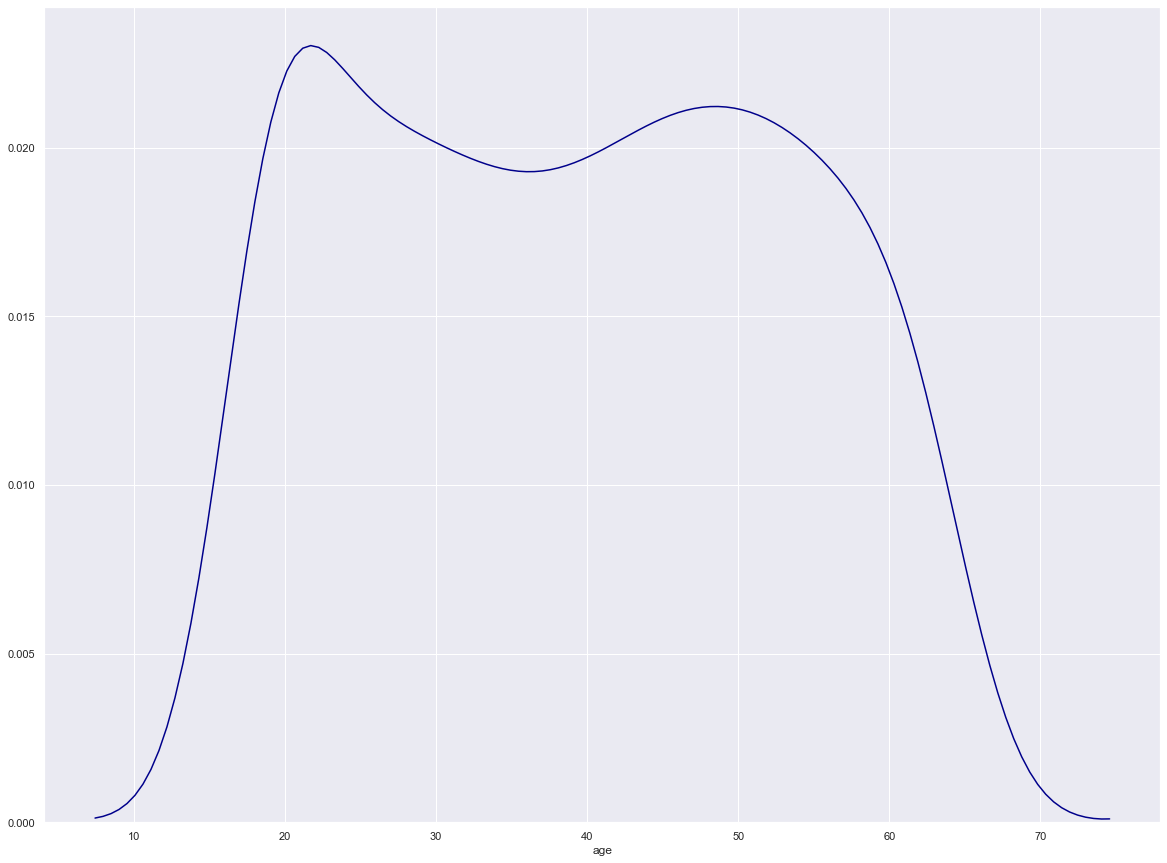

In [17]:
#plot the distribution of age
plt.figure(figsize=(20,15))
sns.distplot(mydata['age'],color='Darkblue',hist=False) 
#show measure of the asymmetry of the probability distribution of age
print('Measure of skewness of Age',mydata['age'].skew())

Measure of skewness of Charges 1.5158796580240388


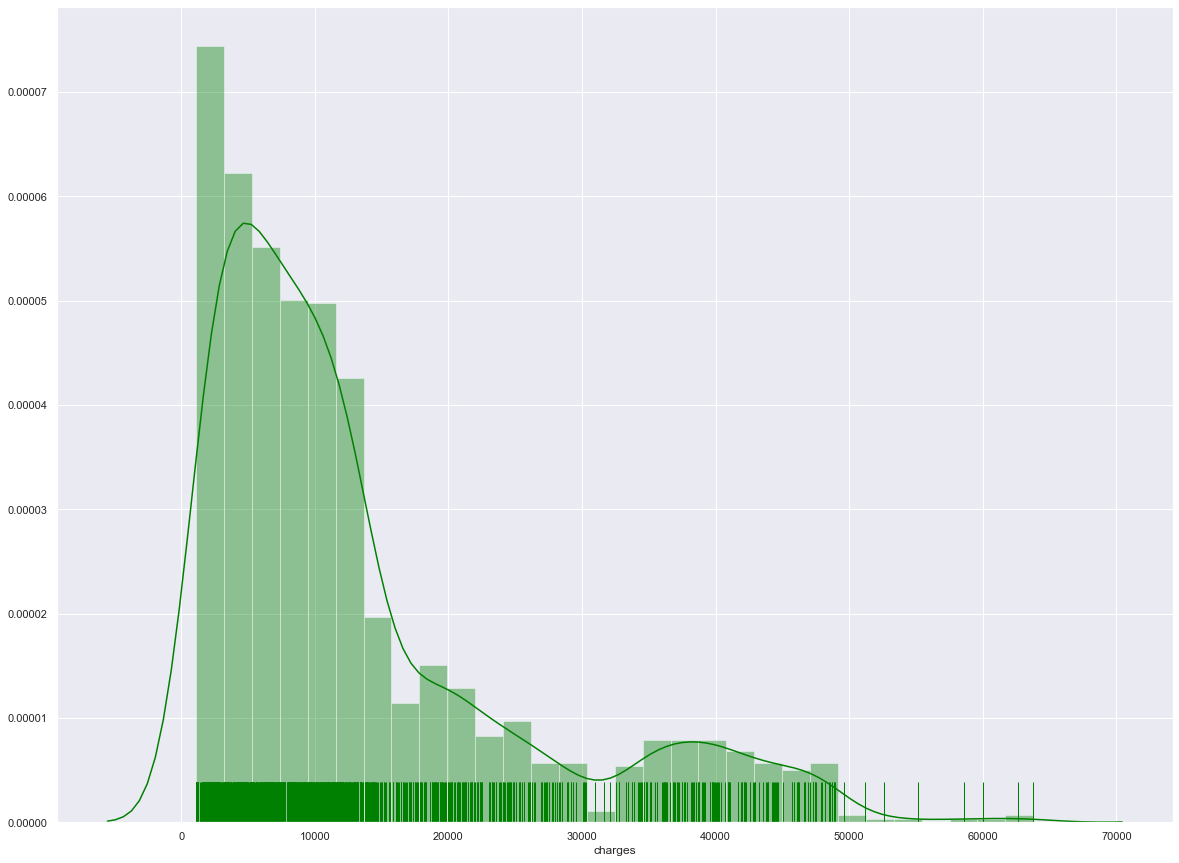

In [18]:
#plot the distribution of charges
plt.figure(figsize=(20,15))
sns.distplot(mydata['charges'],rug=True,kde=True,color='green');
# Dtermine the measure of the asymmetry of the probability distribution of charges
print('Measure of skewness of Charges',mydata['charges'].skew())

BMI : Approximately normally distributed.
Age : Normal Distribution
Charge : Highly skewed distribution    

# 3.g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

IQR: 8.3975


Outliers,count
bmi,
False,1329
True,9


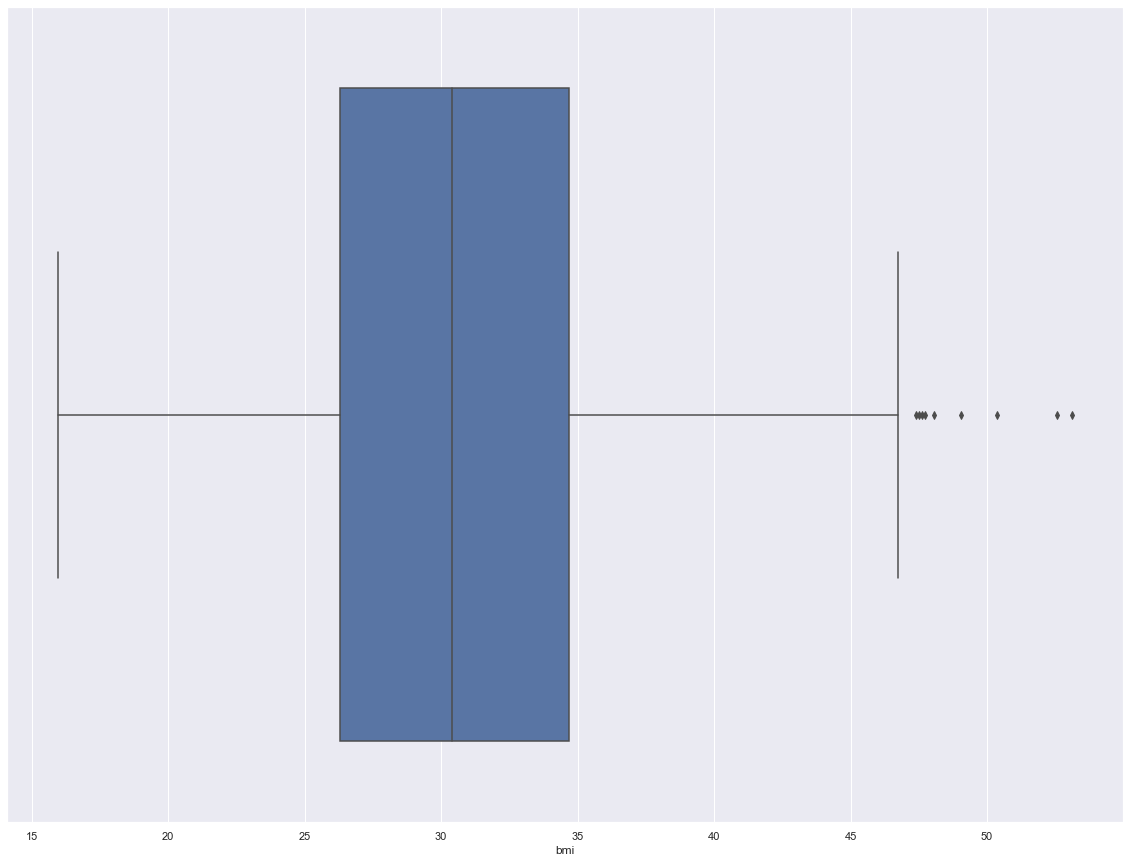

In [19]:
#use IQR method to detect the presence of Outliers
plt.figure(figsize=(20,15))
sns.boxplot(mydata['bmi']);
Q1 = mydata['bmi'].quantile(0.25)
Q3 = mydata['bmi'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:',IQR)
# Outliers are detected by checking the region of data which is less than difference between Q1 and 1.5*Q3.
#or the region which is greater than sum of Q1 and 1.5*Q3.
out= [(mydata['bmi'] < (Q1 - 1.5 * IQR)) | (mydata['bmi'] > (Q3 + 1.5 * IQR))]
pd.crosstab(out,columns='count',colnames=['Outliers'])  


IQR value of bmi is 8.39 and from the above Frequency tabel, outliers count is 9 which is 
clearly visualized the presence of outliers in the Box plot distribution of bmi. 

IQR: 24.0


Outliers,count
age,
False,1338


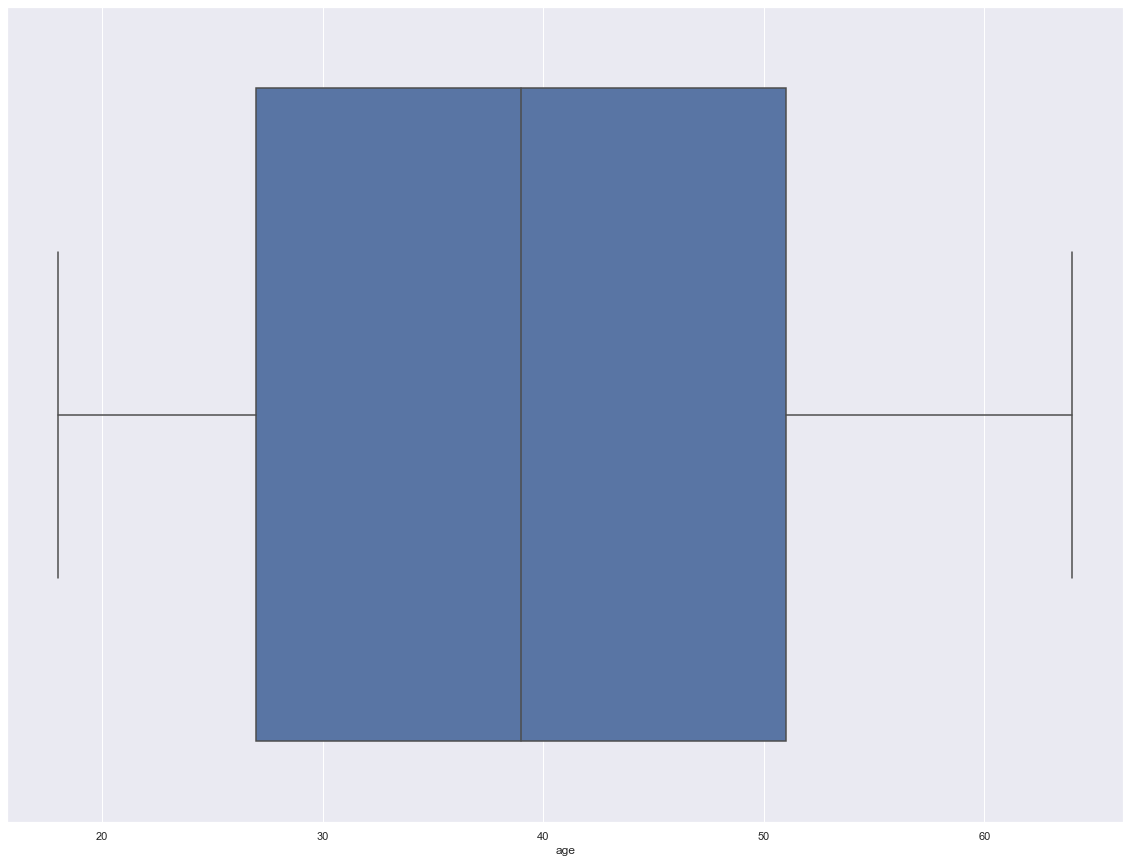

In [20]:
plt.figure(figsize=(20,15))
sns.boxplot(mydata['age']);
Q1 = mydata['age'].quantile(0.25)
Q3 = mydata['age'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:',IQR)
out= [(mydata['age'] < (Q1 - 1.5 * IQR)) | (mydata['age'] > (Q3 + 1.5 * IQR))]
pd.crosstab(out,columns='count',colnames=['Outliers'])  


IQR value of age is 24 and from the above frequency table,no outliers present which 
clearly depicted in the Box plot as age is normally distributed 

IQR: 11899.625365


Outliers,count
charges,
False,1199
True,139


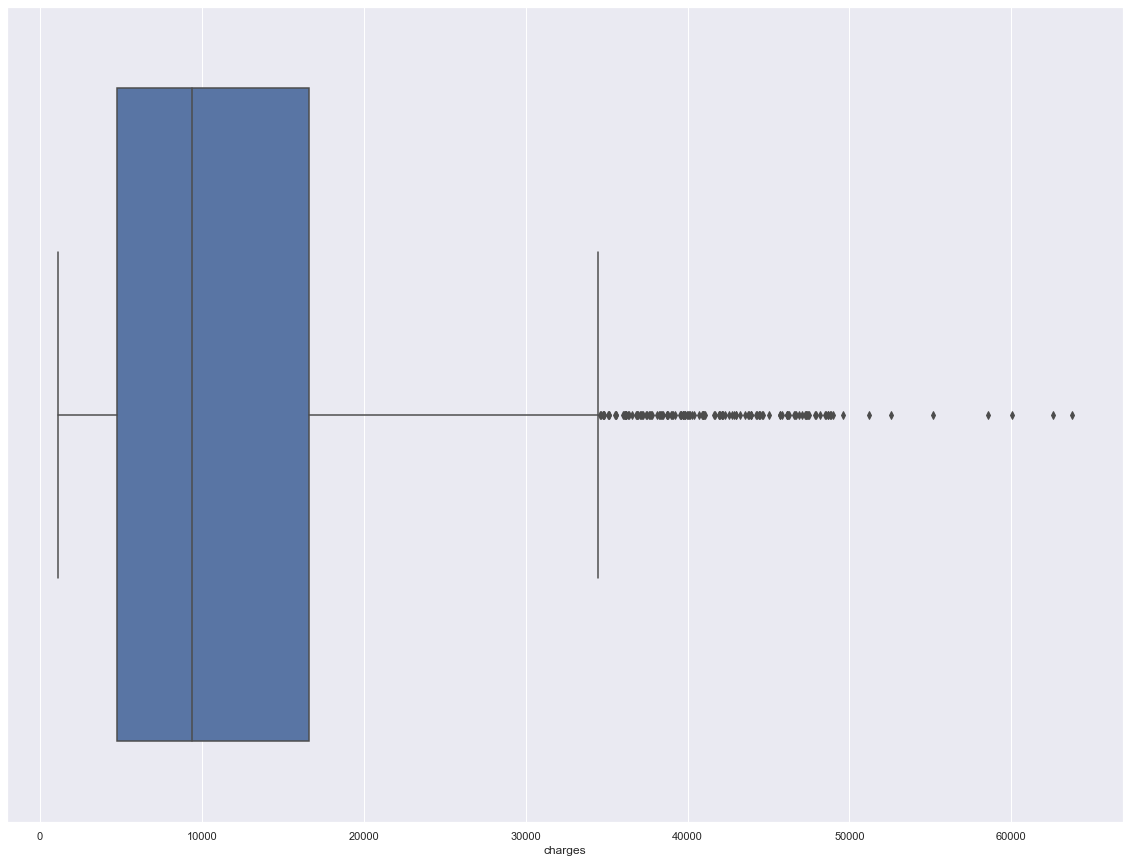

In [21]:
plt.figure(figsize=(20,15))
sns.boxplot(mydata['charges']);
Q1 = mydata['charges'].quantile(0.25)
Q3 = mydata['charges'].quantile(0.75)
IQR = Q3 - Q1
print('IQR:',IQR)
out= [(mydata['charges'] < (Q1 - 1.5 * IQR)) | (mydata['charges'] > (Q3 + 1.5 * IQR))]
pd.crosstab(out,columns='count',colnames=['Outliers'])  


Charges is highly skewed which shows the high Outliers count in the Frequency table
and also in the box plot with the presence of high outliers

# 3.h. Distribution of categorical columns (include children) 

<Figure size 1440x1080 with 0 Axes>

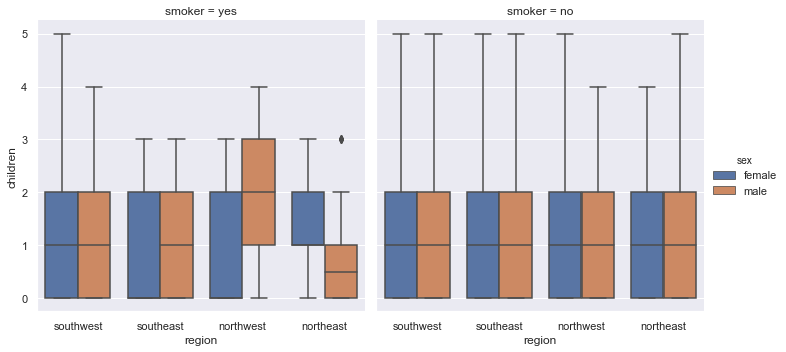

In [22]:
plt.figure(figsize=(20,15))
#Distribution plot of categorial variables where y axis as children using Box Plot.
sns.catplot(x="region", y="children", hue="sex",
                col="smoker", kind= "box",data=mydata);


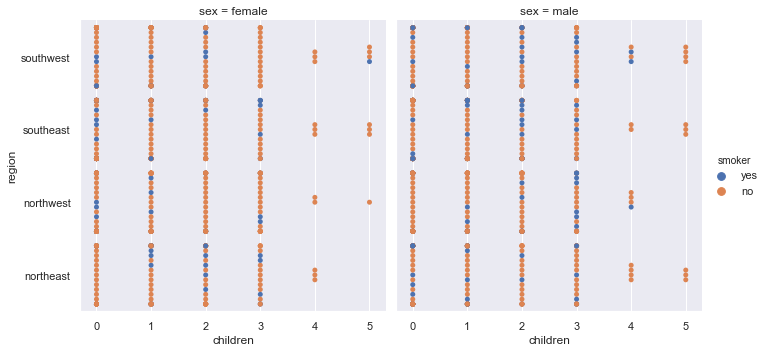

In [23]:
#Categorical plot distribution where x axis as Children using Swarm plot as kind
sns.catplot(x="children", y="region", hue="smoker",
                col="sex", kind= "swarm",data=mydata);


# 3.i. Pair plot that includes all the columns of the data frame 

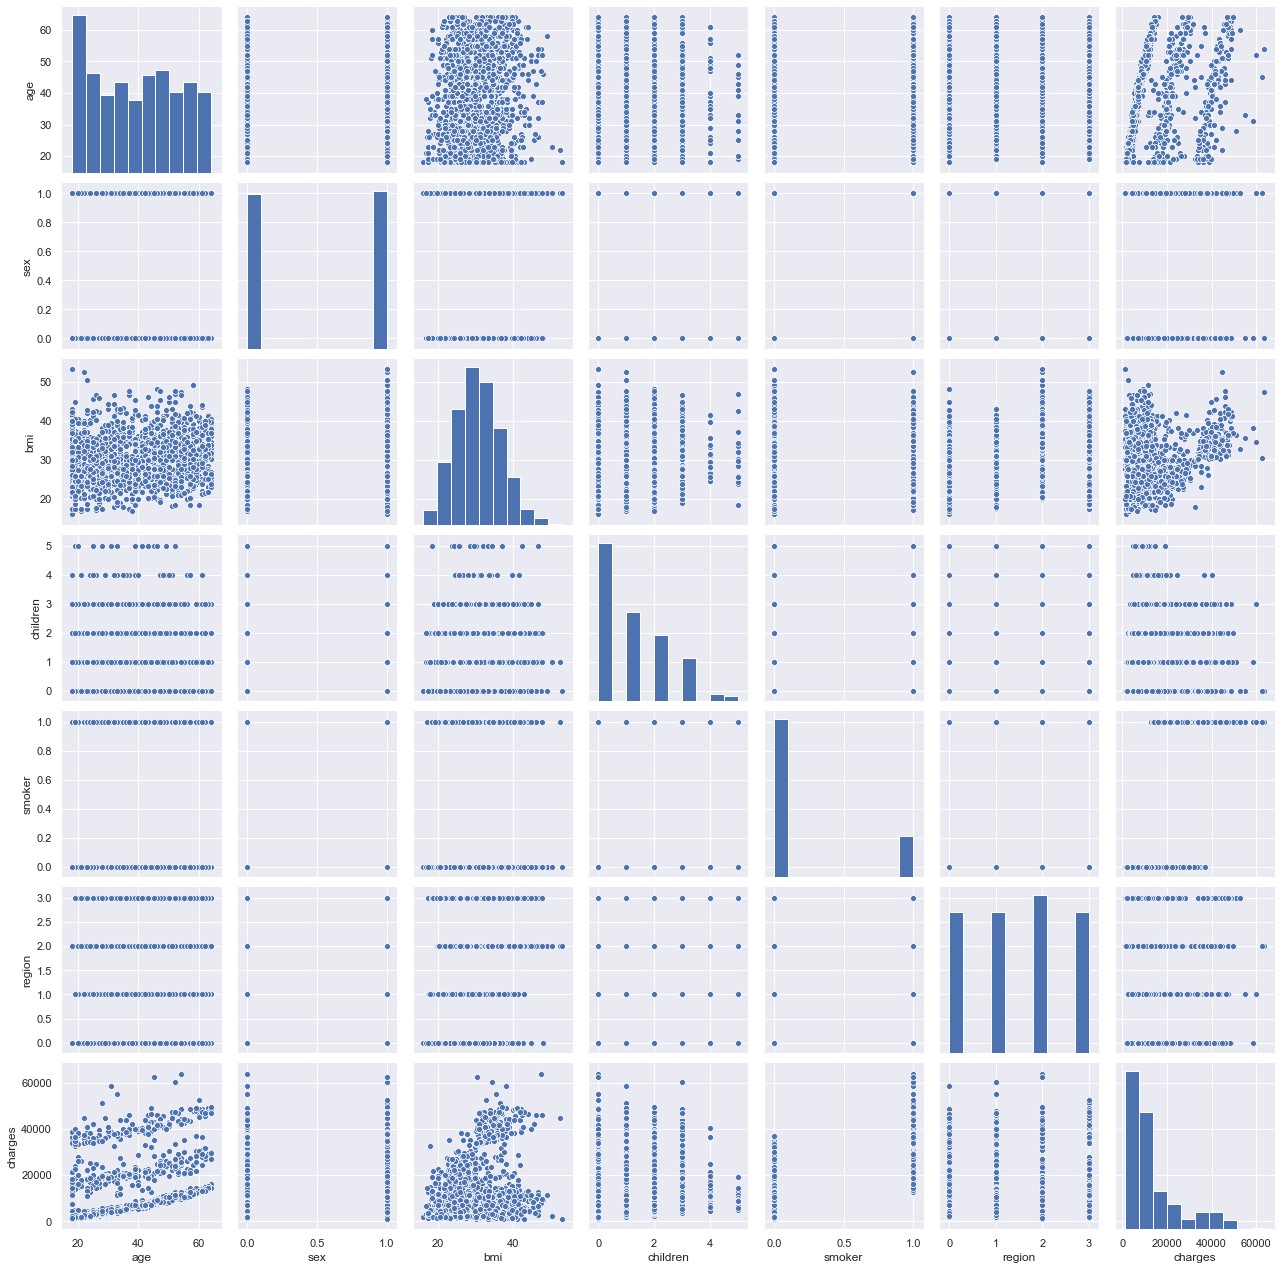

In [7]:
#Perform Label encoding to convert categorical attribues to numeric form as pair plot usually ignore strings
mydata_cod = copy.deepcopy(mydata)
mydata_cod.loc[:,['sex', 'smoker', 'region']] = mydata_cod.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(mydata_cod);

Pair plot which shows the bivaraiate distribution between all attributes using scatter plot
and univaraite distribution of each attribute using Histograms.

# 4.Hypothesis Testing

# 4.a.Do charges of people who smoke differ significantly from the people who don't?

In [24]:
mydata['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

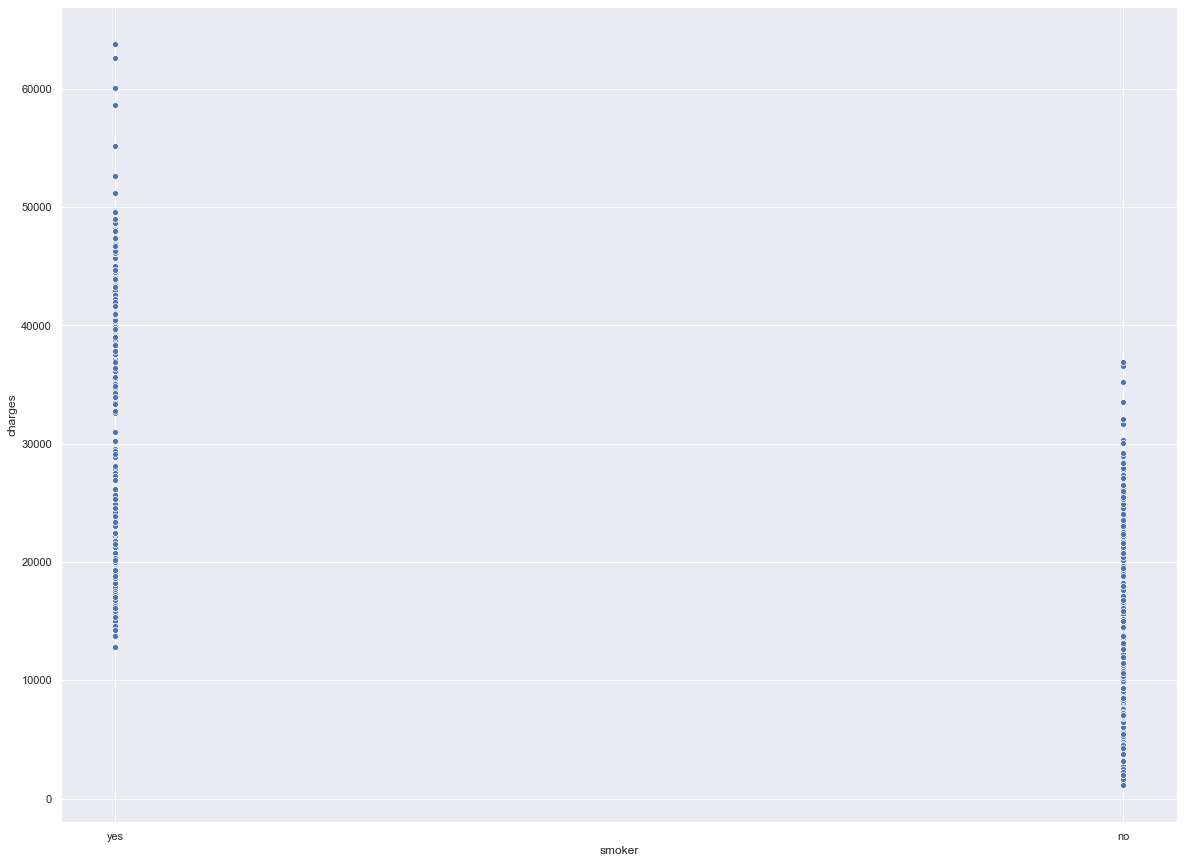

In [25]:
plt.figure(figsize=(20,15))
sns.scatterplot(mydata['smoker'],mydata['charges']);

From the visualization, clearly seen as the charges of smokers differ significantly from the charges of no-smokers.

In [26]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are different"

x = np.array(mydata[mydata['smoker'] == 'yes'].charges) 

y = np.array(mydata[mydata['smoker'] == 'no'].charges)

# calculare T-test statistic for the means of two independent samples of smoker and non-smoker.
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

8.271435842177219e-283


As the calculated p_value is lesser than alpha 0.05,reject the Null Hypotheses.
Charges paid by Smokers and non-smokers significantly differ from each other
From the Visualization plot,charges paid by smokers higher than Non-smokers.

# 4.b. Does bmi of males differ significantly from that of females?

In [27]:
mydata['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

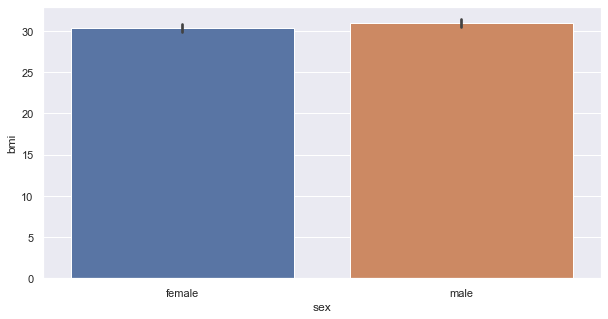

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(mydata['sex'],mydata['bmi']);

From the above box plot,it is difficult to estimate to determine the difference between gender and bmi


In [29]:
Ho = "Gender has zero influence on bmi"   
Ha = "Gender has an influence on bmi"   

x = np.array(mydata[mydata['sex'] == 'male'].bmi)  
y = np.array(mydata[mydata['sex'] == 'female'].bmi) 

#calculate t_test statistic for the mean of two independent sample of gender and bmi
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

if p_value < 0.05:
    print('As the p_value ',{round(p_value,3)},'is low than alpha ,Reject Null:',Ho)
else:
    print('As the p_value',{round(p_value,3)},'is high than alpha,fail to reject Null:',Ho)
  

0.08997637178984932
As the p_value {0.09} is high than alpha,fail to reject Null: Gender has zero influence on bmi


Accepting nullhypothesis as pvalue >0.05. Hence,Gender has zero influence on bmi.

# 4.c.Is the proportion of smokers significantly different in different genders

In [30]:
#Frequency table to count the Female smokers and Male smokers
pd.crosstab(mydata['sex'],mydata['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [31]:
Ho = " Proportion of Gender has same significance on Smokers"
Ha = "Gender differ significantly from Smokers"
# count the Number of female smokers
female_smokers = mydata[mydata['sex'] == 'female'].smoker.value_counts()[1]
#Count the number of male smokers
male_smokers = mydata[mydata['sex'] == 'male'].smoker.value_counts()[1]
#Assign value using Numpy Arrays
smoker_gender=np.array([female_smokers,male_smokers])
#Count the total number of Female people
count_female=mydata[mydata['sex']=='female'].sex.value_counts()[0]
#Count the total number of Male People
count_male=mydata[mydata['sex']=='male'].sex.value_counts()[0]
count=np.array([count_female,count_male])
print('female_smoker',smoker_gender[0] , 'male_smoker',smoker_gender[1])
print('Female_count',count[0],'male count',count[1])
prop_female_smoker = smoker_gender[0]/count[0]
prop_male_smoker= smoker_gender[1]/count[1]
print(f'Proportion of Female smokers: {round(prop_female_smoker,2)}%')
print(f'Proportion of Male smokers :{round(prop_male_smoker,2)}%')

female_smoker 115 male_smoker 159
Female_count 662 male count 676
Proportion of Female smokers: 0.17%
Proportion of Male smokers :0.24%


In [32]:
#Using Test for proportions based on normal (z) test
from statsmodels.stats.proportion import proportions_ztest
#calculate z_test statistic 
stat, pval = proportions_ztest([female_smokers, male_smokers] , [count_female, count_male])

if pval < 0.05:
    print(f'At the p-value of {round(pval,3)}')
    print('Reject the Null:',Ho)
else:
    print(f'At the p-value of {round(pval,3)}')
    print('fail to reject the Null:',Ho)

At the p-value of 0.005
Reject the Null:  Proportion of Gender has same significance on Smokers


Hence,Rejecting null hypothesis as smoking habits differ significantly with the gender.

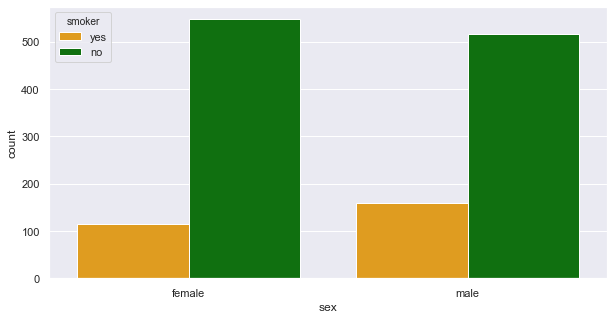

In [33]:
plt.figure(figsize=(10,5))
sns.countplot("sex",hue="smoker",data=mydata,palette=('orange','green'));

From the above visualization, Female smokers differ significantly from male smokers

# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [34]:
Ho = "Children Birthcount has zero effect on Women's BMI"   
Ha = "Children_Birthcount has the greatest effect on Women's BMI" 

#Perform Label encoding to convert categorical attribute Sex to numerical form
#For Numerical computation between women's bmi with Women who have zero,one and two children.
female_data = copy.deepcopy(mydata[mydata['sex'] == 'female'])

zero = female_data[female_data.children == 0]['bmi']
one = female_data[female_data.children == 1]['bmi']
two = female_data[female_data.children == 2]['bmi']
#Perform one-way ANOVA testing
f_stat, p_value = stats.f_oneway(zero,one,two)
print('P_value',p_value)

if p_value < 0.05:
    print(f'At the p-value of {round(p_value,3)}')
    print('Reject the Null:',Ho)
else:
    print(f'At the p-value of {round(p_value,3)}')
    print('fail to reject the Null:',Ho)

P_value 0.7158579926754841
At the p-value of 0.716
fail to reject the Null: Children Birthcount has zero effect on Women's BMI


Accepting the null hypothesis which clearly shows the number of children has no greater effect on difference in women bmi.

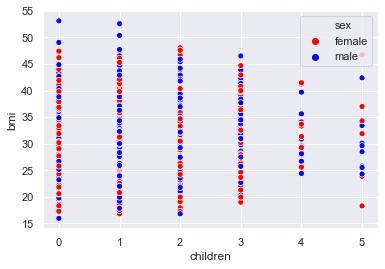

In [35]:
sns.scatterplot (mydata['children'],mydata['bmi'],hue=mydata['sex'],palette=['red','blue']);
                 

Frome the above scatter plot distribution,clearly highlights that the Children Birthcount has no 
effect on  difference in Women's BMI